In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Метод Эйлера

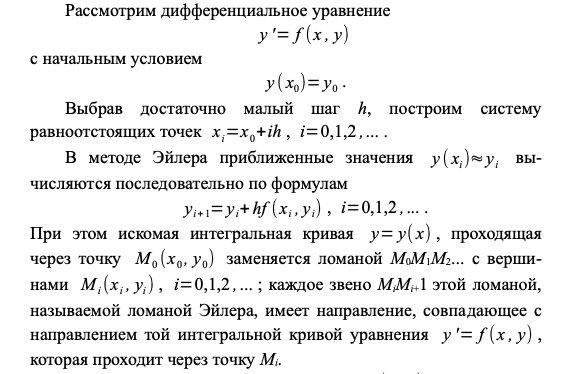

Введем функцию, описывающую ДУ:

In [3]:
def equation(y, x):
    return x**2

Решение

In [5]:
def function(x):
    return x**(3) / 3

Реализация метода

In [14]:
def eiler(end, nu, acc):
    step = acc**(1/2)
    x_pnt, sol = [0], [nu]
    while x_pnt[-1] < end:    
        next_y = sol[-1] + step * equation(sol[-1], x_pnt[-1])
        next_y2n = sol[-1] + step / 2 * equation(sol[-1], x_pnt[-1])
        if abs(next_y2n - next_y) < acc:
            x_pnt.append(x_pnt[-1] + step)
            sol.append(next_y)
            step = 2 * step
        else:
            step = step / 2
            continue
    return x_pnt, sol

Text(0.5, 1.0, 'Численное решение методом Эйлера')

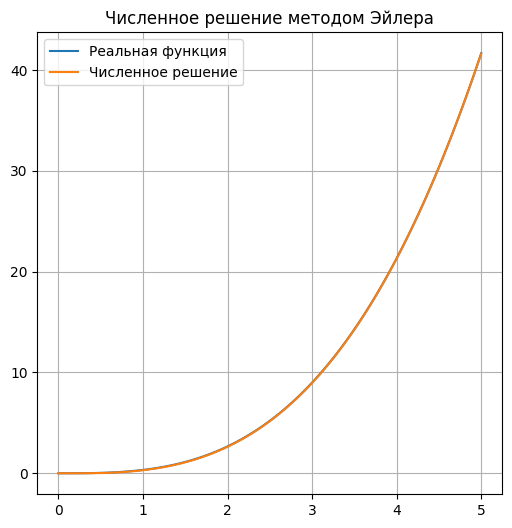

In [17]:
nu = 0
end = 5
x = np.linspace(0, end, 100)
func = function(x)

x_sol, sol = eiler(end, nu, 10**(-2))

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid()
ax.plot(x, func, label='Реальная функция')
ax.plot(x_sol, sol, label='Численное решение')
ax.legend()
plt.title('Численное решение методом Эйлера')

Теперь решим дифференциальное уравнение 2-го порядка. Для этого надо трансформировать функцию `eiler()`

$y'' + 0.1 y' + 3 y = 0$. Представим в форме Коши:

$y' = z$

$y'' = -0.1 z - 3t$

In [71]:
def equations(y, t):
    '''
    Система ДУ
    param
    -----
    y: lst
            значения функций на пред. шаге ex: [y, z]
    '''
    dydt = y[1]
    dzdt = -0.1 * y[1] - 3 * y[0]
    return [dydt, dzdt]

In [72]:
def eiler(end, nu, acc):
    step = acc**(1/2)
    t_pnt, sol_y, sol_z = [0], [nu[0]], [nu[1]]
    while t_pnt[-1] < end:    
        next_y = sol_y[-1] + step * equations([sol_y[-1], sol_z[-1]], t_pnt[-1])[0]
        next_z = sol_z[-1] + step * equations([sol_y[-1], sol_z[-1]], t_pnt[-1])[1]
        next_y2n = sol_y[-1] + step / 2 * equations([sol_y[-1], sol_z[-1]], t_pnt[-1])[0]
        next_z2n = sol_z[-1] + step / 2 * equations([sol_y[-1], sol_z[-1]], t_pnt[-1])[1]
        if abs(next_y2n - next_y) < acc:
            t_pnt.append(t_pnt[-1] + step)
            sol_y.append(next_y)
            sol_z.append(next_z)
            step = 2 * step
        else:
            step = step / 2
            continue
    return t_pnt, sol_y, sol_z

Text(0.5, 1.0, 'Численное решение методом Эйлера')

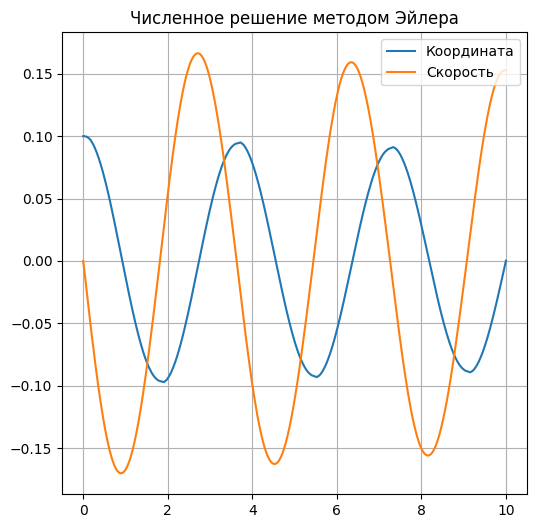

In [74]:
nu = [0.1, 0]
end = 10

t_sol, y, v = eiler(end, nu, 10**(-3))

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid()

ax.plot(t_sol, y, label='Координата')
ax.plot(t_sol, v, label='Скорость')
ax.legend()
plt.title('Численное решение методом Эйлера')

## Метод Рунге-Кутты 4-го порядка

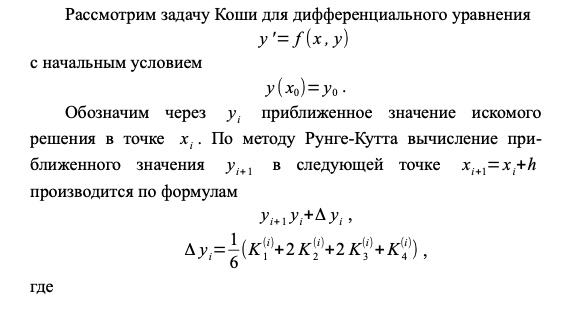

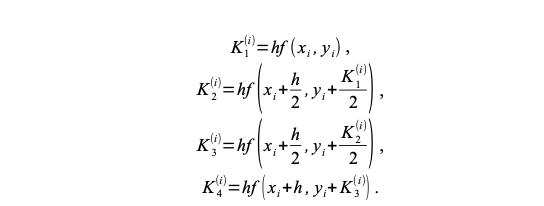

In [77]:
def coeff_function(step, y, t):
    k1 = step * equation(y, t)
    k2 = step * equation(y + k1 / 2, t + step / 2)
    k3 = step * equation(y + k2 / 2, t + step / 2)
    k4 = step * equation(y + k3, t + step)
    return k1 + 2 * k2 + 2 * k3 + k4

def rk4(end, nu, acc):
    step = acc**(1/2)
    t_pnt, sol_y = [0], [nu]
    while t_pnt[-1] < end:
        next_y = sol_y[-1] + 1 / 6 * coeff_function(step, sol_y[-1], t_pnt[-1])
        next_y2n = sol_y[-1] + 1 / 6 * coeff_function(step / 2, sol_y[-1], t_pnt[-1])
        if abs(next_y2n - next_y) < acc:
            t_pnt.append(t_pnt[-1] + step)
            sol_y.append(next_y)
            step = 2 * step
        else:
            step = step / 2
    return t_pnt, sol_y

Text(0.5, 1.0, 'Численное решение методом Рунге-Кутты 4-го порядка')

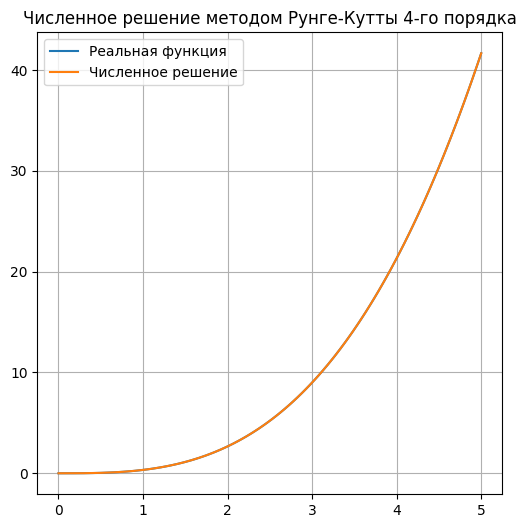

In [78]:
nu = 0
end = 5
x = np.linspace(0, end, 100)
func = function(x)

x_sol, sol = rk4(end, nu, 10**(-2))

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid()
ax.plot(x, func, label='Реальная функция')
ax.plot(x_sol, sol, label='Численное решение')
ax.legend()
plt.title('Численное решение методом Рунге-Кутты 4-го порядка')

Распишем алгоритм для случая ДУ 2-го порядка:

In [83]:
def coeff_function(step, sol, t):
    temp_lst = sol
    k1 = step * equations(temp_lst, t)[0]
    l1 = step * equations(temp_lst, t)[1]
    temp_lst = [sol[0] + k1 / 2, sol[1] + l1 / 2]
    k2 = step * equations(temp_lst, t + step / 2)[0]
    l2 = step * equations(temp_lst, t + step / 2)[1]
    temp_lst = [sol[0] + k2 / 2, sol[1] + l2 / 2]
    k3 = step * equations(temp_lst, t + step / 2)[0]
    l3 = step * equations(temp_lst, t + step / 2)[1]
    temp_lst = [sol[0] + k3, sol[1] + l3]
    k4 = step * equations(temp_lst, t + step)[0]
    l4 = step * equations(temp_lst, t + step)[1]
    return k1 + 2 * k2 + 2 * k3 + k4, l1 + 2 * l2 + 2 * l3 + l4

def rk4(end, nu, acc):
    step = acc**(1/2)
    t_pnt, sol = [0], [[nu[0]], [nu[1]]]
    while t_pnt[-1] < end:
        temp_y, temp_z = coeff_function(step, [sol[0][-1], sol[1][-1]], t_pnt[-1])
        next_y = sol[0][-1] + 1 / 6 * temp_y
        next_z = sol[1][-1] + 1 / 6 * temp_z
        temp_y, temp_z = coeff_function(step / 2, [sol[0][-1], sol[1][-1]], t_pnt[-1])
        next_y2n = sol[0][-1] + 1 / 6 * temp_y
        next_z2n = sol[1][-1] + 1 / 6 * temp_z
        if abs(next_y2n - next_y) < acc:
            t_pnt.append(t_pnt[-1] + step)
            sol[0].append(next_y)
            sol[1].append(next_z)
            step = 2 * step
        else:
            step = step / 2
    return t_pnt, sol[0], sol[1]

Text(0.5, 1.0, 'Численное решение методом Рунге-Кутты 4-го порядка')

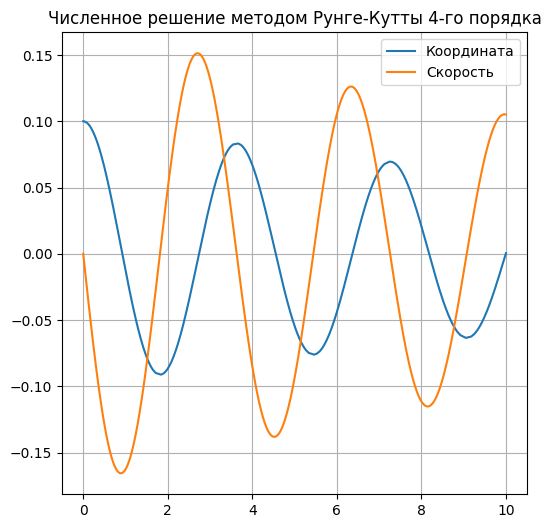

In [85]:
nu = [0.1, 0]
end = 10

t_sol, y, v = rk4(end, nu, 10**(-3))

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid()

ax.plot(t_sol, y, label='Координата')
ax.plot(t_sol, v, label='Скорость')
ax.legend()
plt.title('Численное решение методом Рунге-Кутты 4-го порядка')